# Student Id: 18203485 

# Student Name : Fergus Mc Hale

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import percentile
import random
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import FactorAnalysis

from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import learning_curve
from sklearn.svm import SVC 
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

import pandas as pd
import seaborn as sns
from sklearn.preprocessing import Imputer
from sklearn.metrics import classification_report, confusion_matrix
import scipy.stats as stats
import math

%matplotlib inline

In [2]:
CSV_SPLIT = ','
MAX_ITERATIONS = 10

# Task 1

# Fill-in the missing values in the bank dataset. Use the EDA techniques from E-tivity 1 to decide how to fill in missing values. In your notebook, explain shortly (max 250 words) the decisions you have taken.

In [3]:
data = pd.read_csv('./data/bank_et2.csv',sep=CSV_SPLIT, delimiter=None,index_col='Unnamed: 0') #For local Machine

In [4]:
dataset = data.values

In [5]:
data.apply(lambda x: sum(x.isnull()), axis=0)

age              12
job              10
marital           0
education       104
default           0
balance           0
ratio_bal_ln      0
ratio_ln_inc      0
housing           0
loan              0
contact         191
day               0
month             0
duration          0
campaign          0
pdays             0
previous          0
poutcome        454
subscribed        0
dtype: int64

In [6]:
imputer = Imputer(missing_values='NaN', strategy='mean')
imputer.fit(data['age'].values.reshape(-1, 1))
data['age'] = imputer.transform(data['age'].values.reshape(-1, 1))

C:\Users\fergu\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [7]:
data['job'].fillna('unknown', inplace=True)

In [8]:
data['education'].fillna('unknown', inplace=True)

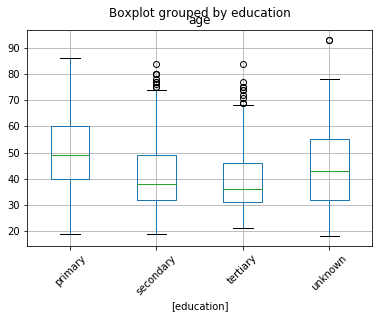

In [9]:
data.boxplot(column='age', by=['education'], rot=45)

In [10]:
data['contact'].value_counts()

cellular     1663
telephone     146
Name: contact, dtype: int64

In [11]:
data['contact'].fillna('unknown', inplace=True)

In [12]:
data['poutcome'].value_counts()

failure    955
success    444
other      147
Name: poutcome, dtype: int64

In [13]:
data['poutcome'].fillna('other', inplace=True)

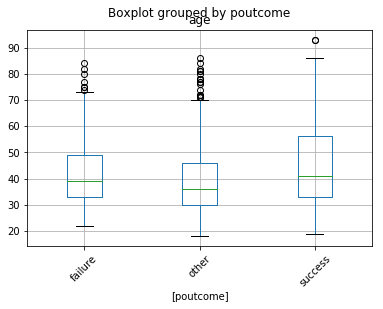

In [14]:
data.boxplot(column='age', by=['poutcome'], rot=45)

In [15]:
data.describe()

,age,balance,ratio_bal_ln,ratio_ln_inc,day,duration,campaign,pdays,previous
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,41.753018,1413.663500,0.241951,0.485030,13.851500,292.020500,1.909500,167.896000,2.561500
std,12.686108,3131.224213,0.821604,1.075543,9.712189,221.557295,1.378862,131.754126,3.400735
min,18.000000,-980.000000,-2.632068,-2.851405,1.000000,7.000000,1.000000,-1.000000,0.000000
25%,32.000000,201.500000,-0.308018,-0.274181,5.000000,146.000000,1.000000,75.750000,1.000000
50%,38.000000,551.000000,0.224099,0.487082,12.000000,236.000000,1.000000,182.000000,2.000000
75%,50.000000,1644.500000,0.806315,1.211896,23.000000,379.000000,2.000000,251.000000,3.000000
max,93.000000,81204.000000,2.961979,4.046914,31.000000,1823.000000,11.000000,854.000000,55.000000


# Top 5

In [16]:
data.head(5)

,age,job,marital,education,default,balance,ratio_bal_ln,ratio_ln_inc,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,32.0,technician,single,tertiary,no,392,1.300134,0.473895,yes,no,cellular,1,apr,957,2,131,2,failure,no
1,39.0,technician,divorced,secondary,no,688,-0.193701,0.237021,yes,yes,cellular,1,apr,233,2,133,1,failure,no
2,59.0,retired,married,secondary,no,1035,1.334266,0.121981,yes,yes,cellular,1,apr,126,2,239,1,failure,no
3,47.0,blue-collar,married,secondary,no,398,0.362286,1.251328,yes,yes,cellular,1,apr,274,1,238,2,failure,no
4,54.0,retired,married,secondary,no,1004,0.072075,-0.533738,yes,no,cellular,1,apr,479,1,307,1,failure,no


# Bottom 5

In [17]:
data.tail(5)

,age,job,marital,education,default,balance,ratio_bal_ln,ratio_ln_inc,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1995,20.0,student,single,unknown,no,2785,-2.170524,1.081071,no,no,cellular,16,sep,327,2,-1,0,other,yes
1996,28.0,admin.,single,secondary,no,127,0.811788,1.134496,no,no,cellular,16,sep,1334,2,-1,0,other,yes
1997,81.0,retired,married,primary,no,1154,0.504655,0.042190,no,no,telephone,17,sep,231,1,-1,0,other,yes
1998,46.0,services,married,primary,no,4343,-0.965874,0.302708,yes,no,unknown,20,sep,185,1,-1,0,other,yes
1999,40.0,entrepreneur,married,secondary,no,6403,-0.800893,1.066659,no,no,cellular,22,sep,208,2,-1,0,other,yes


# Recheck on empty fields

In [18]:
data.apply(lambda x: sum(x.isnull()), axis=0)

age             0
job             0
marital         0
education       0
default         0
balance         0
ratio_bal_ln    0
ratio_ln_inc    0
housing         0
loan            0
contact         0
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome        0
subscribed      0
dtype: int64

# Task 1 Comment

The following were the missing values within the dataset
Inputer is being used on age column to fill in missing values
The following fields was replaced by unknown due not knowing any other ways to classify them other than in a new category

These fields are :

* job : 10 
* education : 104 
* contact : 191 
* poutcome : 454

There were other ways to approach this such as Deleting large number of rows where the NaN is present but this wouldnt make the dataset equal by droping those rows.
For a large number of numerical categories median could be used to fill in its missing values as a quick way to handle the column.
I chose to assign a unique category to job, education , contact , poutcome it will result in lower variance with one hot encoding and negates the loss of data as a new category has been added.
It inadvertanetly add variance to the data that may affect the performance of the chosen algorithm not unless KNN which can handle missing values.

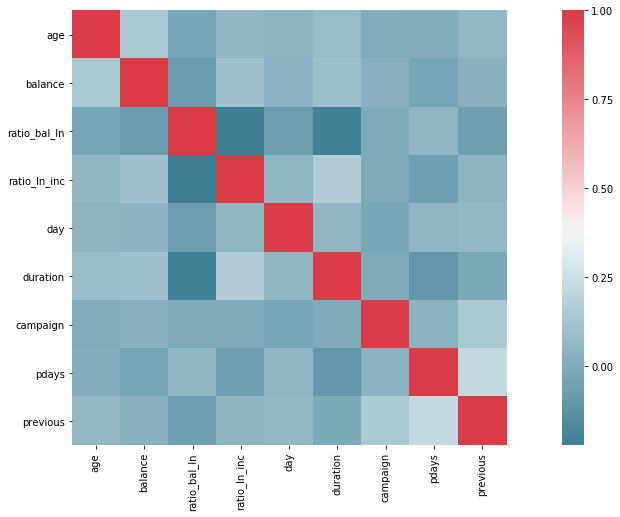

In [19]:
f, ax = plt.subplots(figsize=(20, 8))
corr = data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

C:\Users\fergu\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


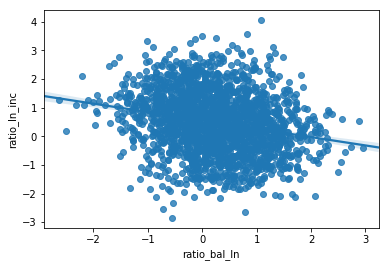

In [20]:
sns.regplot(x='ratio_bal_ln', y='ratio_ln_inc', data=data)

# Task 2

Decide on the treatment of outliers in the bank data set. If appropriate, remove examples with extreme or unexpected attribute values, apply log transformation to numeric attributes with extreme values. Use other methods, if appropriate, to treat outliers as well. In your notebook, explain shortly (max 250 words) the decisions you have taken.

In [21]:
data['ratio_bal_ln_log'] = np.log(data['ratio_bal_ln'])

C:\Users\fergu\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


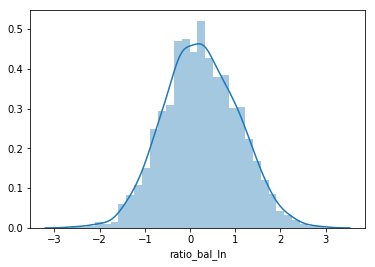

In [22]:
sns.distplot(data['ratio_bal_ln'])

In [23]:
numerical_columns = data.select_dtypes(include=['category', object]).columns

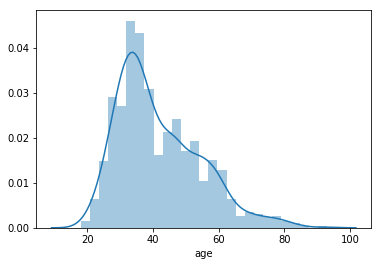

In [24]:
sns.distplot(data['age'])

In [25]:
data['age_log'] = np.log(data['age'])

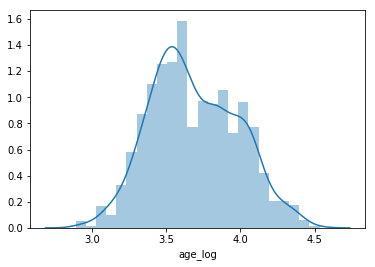

In [26]:
sns.distplot(data['age_log'])

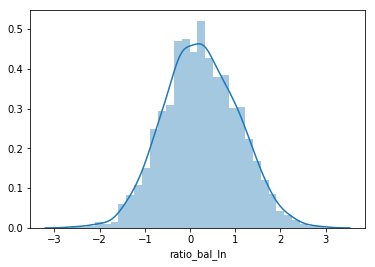

In [27]:
sns.distplot(data['ratio_bal_ln'])

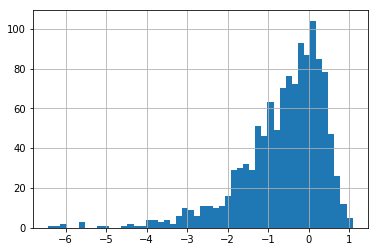

In [28]:
data['ratio_bal_ln_log'].hist(bins=50)

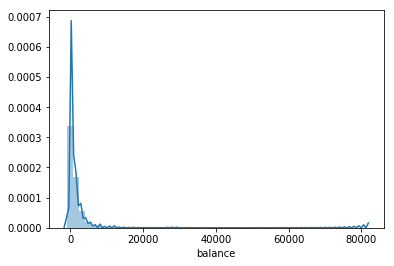

In [29]:
sns.distplot(data['balance'])

As seen from the distribution plot above there is one outliner of 80000 in the entire distribution.This cannot be removed as in every society there is individuals of different wealth brackets this dataset shows only one 

In [30]:
data['balance'].min()

-980

The minimum balance is negative so in order to make this an even distribution this needs to be counteracted on the row by adding an extra 20 to the row which creates a more even distribution

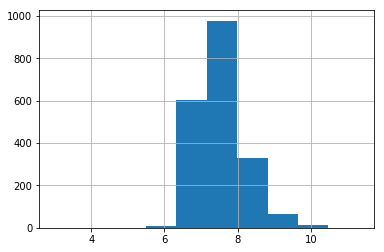

In [31]:
data["balance_positive"] = data["balance"] + 1000
data['balance_positive'].apply(np.log).hist()
plt.show()

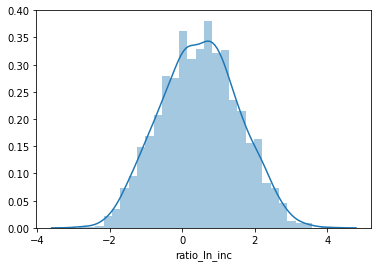

In [32]:
sns.distplot(data['ratio_ln_inc'])

In [33]:
data['ratio_ln_inc_log'] = np.log(data['ratio_ln_inc'])

C:\Users\fergu\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


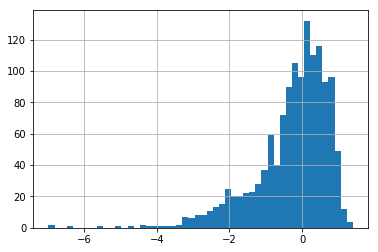

In [34]:
data['ratio_ln_inc_log'].hist(bins=50)

In [35]:
cols_to_transform = data.select_dtypes(include=['category', object]).columns

In [36]:
data_with_dummies = pd.get_dummies(data,columns=cols_to_transform)

Interquatile Range

In [37]:
def outliers_iqr(ys):
    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    return np.where((ys > upper_bound) | (ys < lower_bound))

Z Score

In [38]:
def outliers_z_score(ys):
    threshold = 3
    mean_y = np.mean(ys)
    stdev_y = np.std(ys)
    z_scores = [(y - mean_y) / stdev_y for y in ys]
    return np.where(np.abs(z_scores) > threshold)

In [39]:
ratio_bal_in_outliners = outliers_iqr(data['ratio_bal_ln'])

In [40]:
print(ratio_bal_in_outliners)

(array([  34,   67,  194,  220,  344,  882,  946, 1010, 1232, 1398, 1714,
       1863, 1884, 1975, 1995], dtype=int64),)


In [41]:
ratio_ln_inc_outliners = outliers_iqr(data['ratio_ln_inc'])

In [42]:
print(ratio_bal_in_outliners)

(array([  34,   67,  194,  220,  344,  882,  946, 1010, 1232, 1398, 1714,
       1863, 1884, 1975, 1995], dtype=int64),)


In [43]:
print(ratio_ln_inc_outliners)

(array([ 687,  732,  819, 1112, 1308, 1550], dtype=int64),)


In [44]:
balance_outliners = outliers_z_score(data['balance'])

In [45]:
print(balance_outliners)

(array([   9,   59,  227,  468,  498,  614,  659, 1004, 1010, 1020, 1033,
       1057, 1088, 1106, 1212, 1273, 1328, 1374, 1390, 1422, 1431, 1440,
       1471, 1551, 1634, 1657, 1790, 1802, 1834], dtype=int64),)


In [46]:
data_with_dummies.fillna(0, inplace=True)

Scale

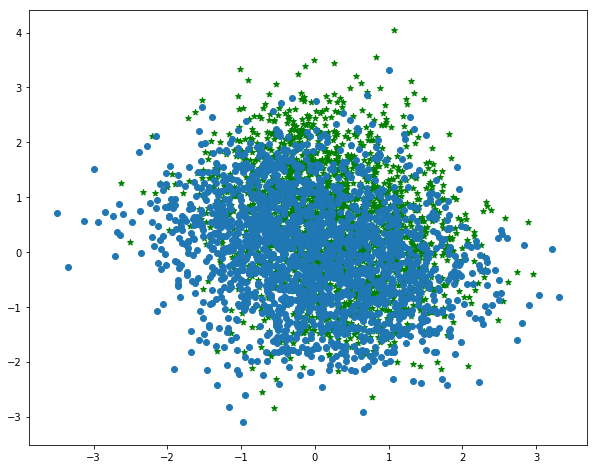

In [47]:
plt.figure(figsize=(10,8))
X = data[['ratio_bal_ln', 'ratio_ln_inc']]
std_scale = preprocessing.StandardScaler().fit(X)
data_std = std_scale.transform(X)
plt.scatter(X['ratio_bal_ln'], X['ratio_ln_inc'],color="green", marker='*')
plt.scatter(data_std[:,0], data_std[:,1])

In [48]:
X_scaled = preprocessing.scale(X)
print("\nAFTER:")
print("Mean =", X_scaled.mean(axis=0))
print("Std deviation =", X_scaled.std(axis=0))


AFTER:
Mean = [-2.84217094e-17  2.84217094e-17]
Std deviation = [1. 1.]


Normalisation L1 L2

In [49]:
X_l1 = preprocessing.normalize(X, norm='l1')
X_l2 = preprocessing.normalize(X, norm='l2')
print("\nL1 normalized data:\n", X_l1[X_l1 != 0.])
print("\nL2 normalized data:\n", X_l2[X_l2 != 0.])


L1 normalized data:
 [ 0.73287078  0.26712922 -0.44971257 ...  0.23861941 -0.42884652
  0.57115348]

L2 normalized data:
 [ 0.93953345  0.34245714 -0.63279721 ...  0.29906041 -0.60043129
  0.79967635]


 # Task 2 Comment

There are many approaches to outlines such as :

* Data Log
* Interquartile Range(IQR)
* Z Score
* Scaling
* Normalisation

A log was performed to on ratio_bal_ln , ratio_ln_inc , age , balance this allows a more even gaussian graph to be created allowing for easier learning
The other approaches are IQR, Z Score that allow the outliners to be discovered given a certain range of 25/75 to then finding their lower bounds of the data
The z score is another approach to this that applies a mean and standard deviation and takes away the values
The log was performed to create a more even gaussian distribution of the values.

# Task 3

Suggest the creation of at least one new feature from the existing ones and justify the usefulness of your choice within the context of the 2-class classification problem you have defined in E-tivity 1.

In [50]:
data['mean_ratio_bal_In_inc'] = data[['ratio_ln_inc_log','ratio_bal_ln_log']].mean(axis=1)

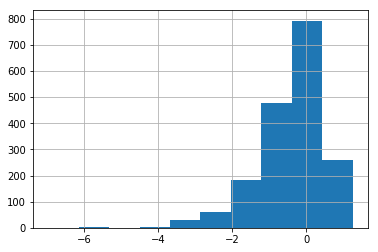

In [51]:
data['mean_ratio_bal_In_inc'].hist()

# Task 3 Comment

The new feature above is the combined elements of ratio_ln_inc_log and ratio_bal_ln log which can now be used as an X variable instead of two features. Other ideas for features would be age and balance mean or balance per age category 

# Task 4

Using the dataset you prepared, perform a classification on the data using scikitlearn’s logistic regression.

Generate plots of the approximate probability P[Ein-Eout|>e]. You can use the exact same approach as in E-tivity 1. In the same figure, plot the Hoeffding bound and the VC bound and check whether or not either bound is exceeded (indicate this clearly in a markdown cell).

In [52]:
data['subscribed_code'] = data['subscribed'].map({'yes': 1, 'no': 0})

In [53]:
data['mean_ratio_bal_In_inc'].isnull().sum()

195

In [54]:
data['mean_ratio_bal_In_inc'].fillna(0, inplace=True)

In [55]:
X = np.array(data['mean_ratio_bal_In_inc']).reshape(-1,1)
y = np.array(data['subscribed_code']).reshape(-1,1)

In [56]:
X.shape
y.shape

(2000, 1)

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Logistic Regression

In [58]:
logistic_classifer = LogisticRegression()
logistic_classifer.fit(X_train, y_train)

C:\Users\fergu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\fergu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [59]:
logistic_classifer.predict(X_train)

array([1, 0, 1, ..., 1, 0, 0], dtype=int64)

In [60]:
logistic_classifer.predict_proba(X_train)

array([[0.4672737 , 0.5327263 ],
       [0.54416873, 0.45583127],
       [0.44940487, 0.55059513],
       ...,
       [0.48148493, 0.51851507],
       [0.52947889, 0.47052111],
       [0.55194254, 0.44805746]])

In [61]:
Ein = 1 - logistic_classifer.score(X_train, y_train)
print("Ein:", Ein)

Eout = 1 - logistic_classifer.score(X_test, y_test)
print("Eout:", Eout)

Ein: 0.4683333333333334
Eout: 0.47124999999999995


In [62]:
y_train_hat = logistic_classifer.predict(X_train)

errors = 0
for i in range(len(y_train)):
    if(y_train_hat[i]!=y_train[i]):
        errors+=1

print(errors)
print(len(y_train))
print("Error Percentage",errors/len(y_train))

562
1200
Error Percentage 0.4683333333333333


In [63]:
y_test_hat = logistic_classifer.predict(X_test)

errors = 0
for i in range(len(y_test)):
    if(y_test_hat[i]!=y_test[i]):
        errors+=1

print(errors)
print(len(y_test))
print("Error Percentage",errors/len(y_test))

377
800
Error Percentage 0.47125


In [64]:
def calc_prob_epsilon(M, Eins, Eouts, epsilons):
    prob_epsilon=[]
    for e in epsilons:   
        counter = 0
        for i in range(M):
            if abs(Eins[i] - Eouts[i])>e:
                   counter +=1
        prob_epsilon.append(counter/M)           
    return prob_epsilon

In [65]:
epsilons = np.arange(0, 1, 0.01)
error_in = [Ein]
error_out = [Eout]
prob_epsilon = calc_prob_epsilon(1, error_in, error_out, epsilons)

print("epsilon proba. dist:", prob_epsilon)

epsilon proba. dist: [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [66]:
epsilons = np.arange(0, 1, 0.01)
N=2000

In [67]:
tolerance = 0.01
dvc = 3
def get_vc_bound(N, dvc, tolerance, Ein):
    return Ein + math.sqrt((1/(2*N)) * math.log((2 * (math.pow(N,dvc) + 1)/tolerance) ))

print(get_vc_bound(N, dvc, tolerance, Ein))

0.552150134670087


In [68]:
def plot(error_in,error_out):
    error_diff = abs(np.array(error_in)-np.array(error_out))
    epsilons = np.arange(0.001,0.20,0.001)
    prob_epsilon=[]
    for e in epsilons:
        prob_epsilon.append(len([1 for i in error_diff if i > e])/len(error_diff))
    plt.plot(epsilons, prob_epsilon)

    hoef = [2*math.exp(-2*N*e**2) for e in epsilons]
    vc = [4*((2*N)**3+1)*math.exp(-(N/8)*e**2) for e in epsilons]

    print("Error exceeds Hoeffding" if max(np.array(prob_epsilon)-np.array(hoef))>0 else "Error does not exceed Hoeffding")
    print("Error exceeds VC" if max(np.array(prob_epsilon)-np.array(vc))>0 else "Error does not exceed VC")
    plt.plot(epsilons, hoef,'r')
    plt.plot(epsilons, vc, 'g')
    plt.yscale('log')
    plt.show()

Error does not exceed Hoeffding
Error does not exceed VC


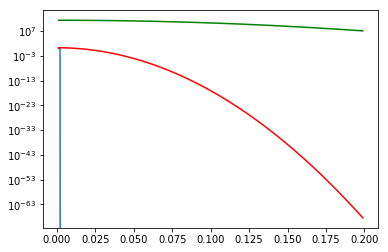

In [69]:
plot(error_in,error_out)

# Task 5

Using the dataset, make learning curves for logistic regression and two other machine learning algorithms of your choosing using scikitlearn’s learning_curve functionality. Choose one algorithm with low complexity in terms of VC dimension and one algorithm with high complexity.

Comment on what information you can derive from the learning curves  (in a markdown cell) and how this information differs between simple and complex machine learning algorithms.

In [70]:
def plot_learning_curve(estimatior,X,y):
    train_sizes, train_scores, test_scores = learning_curve(estimatior, 
                                                        X, 
                                                        y,
                                                        cv=2,
                                                        train_sizes=np.linspace(0.01, 1.0, 50))

    # Create means and standard deviations of training set scores
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)

    # Create means and standard deviations of test set scores
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Draw lines
    plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
    plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

    # Draw bands
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

    # Create plot
    plt.title("Learning Curve")
    plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
    plt.tight_layout()
    plt.show()

# SVC Linear

In [71]:
svclassifier = LinearSVC() 
svclassifier.fit(X_train, y_train) 

C:\Users\fergu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [72]:
y_pred = svclassifier.predict(X_test) 

In [73]:
print(y_pred)

[1 0 1 0 1 1 1 0 1 0 1 0 0 1 1 1 0 0 0 1 0 1 0 1 1 0 1 1 0 1 1 0 0 1 0 1 1
 1 1 0 0 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 0 0 1 0 1 1 1 1 1 0 0 1 1 1 0 1 1 1
 1 0 0 0 0 1 1 0 0 0 1 0 1 1 1 1 1 1 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 1 1 0 0
 0 0 0 0 0 1 1 0 1 0 1 0 0 1 1 0 0 1 1 1 0 0 0 1 1 1 0 1 0 1 1 0 0 0 1 1 1
 1 1 1 0 0 0 1 1 0 1 1 0 0 1 0 0 0 1 0 1 1 1 0 1 1 1 0 1 0 1 0 1 1 1 0 1 1
 0 1 1 1 1 0 1 0 0 0 0 0 0 0 1 1 0 0 1 1 1 0 1 1 1 0 0 0 0 1 0 1 1 0 1 0 0
 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 0 1 1 1 0 1 0 0 1 0 0 1 0 1 0
 0 0 1 0 1 0 0 1 0 1 0 1 1 1 1 0 1 0 0 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 0 0 1
 0 1 1 0 1 0 0 1 1 0 1 1 1 0 0 0 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 0 1 1 0
 0 0 0 1 0 0 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 0 1 1 1 1 0
 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 0 1 1 0 1 0 1 1 0 0 0 0 0 1 1 0 1 1 0
 0 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 0 1 1 1 1 0 1 0 0 1 1 0 0 0 1 1 0 1 1 1 0 1
 1 1 0 0 0 1 1 1 1 1 1 0 

In [74]:
# Transform back to text

In [75]:
Ein = 1 - svclassifier.score(X_train, y_train)
print("Ein:", Ein)

Eout = 1 - svclassifier.score(X_test, y_test)
print("Eout:", Eout)

Ein: 0.4666666666666667
Eout: 0.47


C:\Users\fergu\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\fergu\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\fergu\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\fergu\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y

C:\Users\fergu\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\fergu\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\fergu\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\fergu\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y

C:\Users\fergu\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\fergu\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\fergu\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\fergu\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y

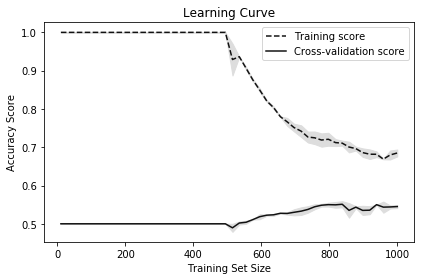

In [76]:
plot_learning_curve(KNeighborsClassifier(),X,y)

# K nearest neighbours 

In [77]:
kneighbours_classifier = KNeighborsClassifier()
kneighbours_classifier.fit(X_train, y_train)

C:\Users\fergu\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [78]:
y_kneighbourspred = kneighbours_classifier.predict(X_test) 

In [79]:
print(y_kneighbourspred)

[0 1 1 0 0 1 0 0 0 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 1 0
 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0
 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 1 1 1 0 0 0 0 1 0 0 1 0 1 1 1 1
 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0
 1 0 0 1 0 0 1 1 0 0 0 1 0 0 1 0 1 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 1 0 0 1 1
 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 1 1 1 0 0 0 1 1 0 0 1 0 1 0 0 0 0 1 1 0 0
 0 0 0 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 0 0 0 1 0 1 0 0 0 1
 0 0 1 0 0 1 0 0 0 1 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 1 0 0 0 1 0 0 0 0 1 0 0
 0 1 0 1 0 1 1 0 1 0 1 0 1 1 0 1 0 1 0 1 1 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 1
 0 0 0 0 0 1 1 0 1 0 0 1 1 0 1 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 1 0
 1 1 1 1 0 1 1 0 1 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 1 1 1 0 1 1 0 1 0 1
 1 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0
 1 0 0 1 0 1 1 0 1 0 1 0 0 1 1 1 0 1 0 0 1 0 1 1 0 0 0 0 0 1 1 1 0 1 1 0 0
 0 1 0 1 1 0 1 0 0 0 0 1 

In [80]:
# Transform back to text

In [81]:
Ein = 1 - kneighbours_classifier.score(X_train, y_train)
print("Ein:", Ein)

Eout = 1 - kneighbours_classifier.score(X_test, y_test)
print("Eout:", Eout)

Ein: 0.3108333333333333
Eout: 0.46875


C:\Users\fergu\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\fergu\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\fergu\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\fergu\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y

C:\Users\fergu\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\fergu\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\fergu\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\fergu\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y

C:\Users\fergu\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\fergu\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\fergu\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\fergu\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y

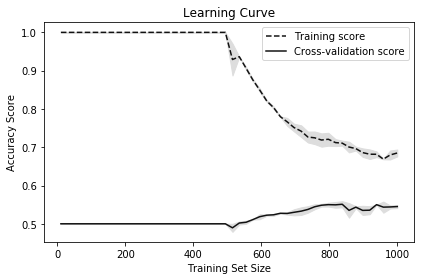

In [82]:
plot_learning_curve(KNeighborsClassifier(),X,y)

# Adaboost Classifier

In [83]:
adaboost_classifier = AdaBoostClassifier()

In [84]:
adaboost_classifier.fit(X_train, y_train)

C:\Users\fergu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [85]:
y_adaboostpred = adaboost_classifier.predict(X_test) 

In [86]:
print(y_adaboostpred)

[0 0 0 0 1 1 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0
 1 1 0 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0
 0 0 0 1 0 1 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 1 1 1
 1 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 1 0 0
 1 1 0 0 1 0 0 1 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 1 0 0 0
 0 1 0 1 0 0 1 0 1 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0
 0 0 0 1 1 1 1 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0
 0 1 1 1 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 1
 1 1 1 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 1 1 1 0 0 0 0 0 1
 0 0 1 1 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0
 0 0 1 1 1 0 1 0 0 0 0 1 

In [87]:
# Transform back to text

In [88]:
Ein = 1 - adaboost_classifier.score(X_train, y_train)
print("Ein:", Ein)

Eout = 1 - adaboost_classifier.score(X_test, y_test)
print("Eout:", Eout)

Ein: 0.4066666666666666
Eout: 0.45125000000000004


C:\Users\fergu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\fergu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\fergu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\fergu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\fergu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\fergu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\fergu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\fergu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\fergu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\fergu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\fergu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\fergu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

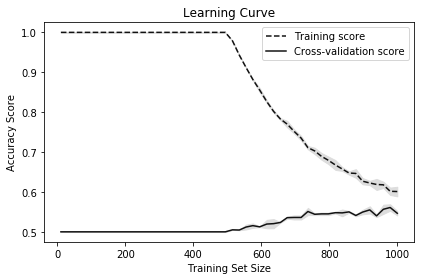

In [89]:
plot_learning_curve(AdaBoostClassifier(),X,y)

In [90]:
#plot_learning_curve(LogisticRegression(),X,y)

* [1] [Outliner Detection] (http://colingorrie.github.io/outlier-detection.html)
* [2] [Feature Engineering] (https://jakevdp.github.io/PythonDataScienceHandbook/05.04-feature-engineering.html)
* [3] [Learning Curve] (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.learning_curve.html)
* [4] [Learning Curve Plotting] (https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html#sphx-glr-auto-examples-model-selection-plot-learning-curve-py)
* [5] [Art of Feature Engineering for Data Science - Nabeel Sarwar] (https://www.youtube.com/watch?v=leTyvBPhYzw)
* [6] [Feature Engineering with H2O - Dmitry Larko, Senior Data Scientist, H2O.ai] [https://www.youtube.com/watch?v=irkV4sYExX4]

Herzallah, W., Faris, H. and Adwan, O. (2018) ‘Feature engineering for detecting spammers on Twitter: Modelling and analysis’, Journal of Information Science, 44(2), pp. 230–247. doi: 10.1177/0165551516684296.